# Code to Produce Visualisations

The code below was made with speed. kachow

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

In [3]:
# Enable LaTeX rendering
plt.rc("text", usetex=True)
plt.rc("font", family="Times New Roman")  # Use a serif font (e.g., Times New Roman)

In [4]:
# Function to check if all DataFrames in a list are identical after sorting
def verify_dfs(dfs):
    sorted_dfs = [df.sort_values(by="distance").reset_index(drop=True) for df in dfs]
    reference_df = sorted_dfs[0]  # Take the first sorted DataFrame as reference
    for i, df in enumerate(sorted_dfs[1:], start=1):
        if not reference_df.equals(df):
            print(f"Mismatch found in DataFrame {i} of the list")
            return False
    return True

## Reading and Plotting Distances
### Reading

The nearest and furthest distances for both geometries were stored in the `data` folder. This contained various variations of the system being ran with different amounts of threads and scheduling.

In [4]:
data_folder = "data\\"
nearest_stds = []
nearest_wrappeds = []
furthest_stds = []
furthest_wrappeds = []


# Loop through each file in the folder
for file_name in os.listdir(data_folder):
    # Check if the file is a .txt file
    if file_name.endswith(".txt"):
        file_path = os.path.join(data_folder, file_name)
        if "nearest_std" in file_path:
            # Read the file into a pandas DataFrame
            df = pd.read_csv(file_path, names = ["distance"])  
            df["Category"] = "nearest std"
            nearest_stds.append(df)
            
        if "nearest_wrapped" in file_path:
            # Read the file into a pandas DataFrame
            df = pd.read_csv(file_path, names = ["distance"]) 
            df["Category"] = "nearest wrapped"
            nearest_wrappeds.append(df)

        if "furthest_std" in file_path:
            # Read the file into a pandas DataFrame
            df = pd.read_csv(file_path, names = ["distance"])
            df["Category"] = "furthest std"
            furthest_stds.append(df)

        if "furthest_wrapped" in file_path:
            # Read the file into a pandas DataFrame
            df = pd.read_csv(file_path, names = ["distance"]) 
            df["Category"] = "furthest wrapped"
            furthest_wrappeds.append(df)

# Verify for each list
is_nearest_stds_equal = verify_dfs(nearest_stds)
is_nearest_wrappeds_equal = verify_dfs(nearest_wrappeds)
is_furthest_stds_equal = verify_dfs(furthest_stds)
is_furthest_wrappeds_equal = verify_dfs(furthest_wrappeds)

# Print results
print(f"Nearest stds are {'identical' if is_nearest_stds_equal else 'not identical'}")
print(f"Nearest wrappeds are {'identical' if is_nearest_wrappeds_equal else 'not identical'}")
print(f"Furthest stds are {'identical' if is_furthest_stds_equal else 'not identical'}")
print(f"Furthest wrappeds are {'identical' if is_furthest_wrappeds_equal else 'not identical'}")


Nearest stds are identical
Nearest wrappeds are identical
Furthest stds are identical
Furthest wrappeds are identical


Yippie! All the data frames are identical for their respective geometries! Another form of verification could be to use the averages. This is stored in `averages.txt`.

In [5]:
averages_df = pd.read_csv("averages.txt", names = ["distance", "category_&_scheduler"], delimiter = "\t")  

# Store each average into a data frame by category
nearest_std_avrgs = []
nearest_wraparound_avrgs = []
furthest_std_avrgs = []
furthest_wraparound_avrgs = []
categories = ["nearest std", "nearest wraparound", "furthest std", "furthest wraparound"]
for category, group in averages_df.groupby("category_&_scheduler"):
    if category == "nearest std":
        nearest_std_avrgs.append(group)  # Add the grouped DataFrame to the list
    elif category == "nearest wraparound":
        nearest_wraparound_avrgs.append(group)  # Add the grouped DataFrame to the list
    elif category == "furthest std":
        furthest_std_avrgs.append(group)  # Add the grouped DataFrame to the list
    elif category == "furthest wraparound":
        furthest_wraparound_avrgs.append(group)  # Add the grouped DataFrame to the list

# Check if each data frame in each category is identical
averages_dfs = [nearest_std_avrgs, nearest_wraparound_avrgs, furthest_std_avrgs, furthest_wraparound_avrgs]
for category, df in zip(categories, averages_dfs):
    outcome = verify_dfs(df)
    print(f"averages in {category} geometry are {'identical' if outcome else 'not identical'}")

print()
# Output Mean
for category, average in zip(categories, averages_dfs):
    mean = average[0]["distance"].mean()
    print(f"average in {category} geometry is {mean}")

averages in nearest std geometry are identical
averages in nearest wraparound geometry are identical
averages in furthest std geometry are identical
averages in furthest wraparound geometry are identical

average in nearest std geometry is 0.00158451
average in nearest wraparound geometry is 0.00158238
average in furthest std geometry is 1.06909
average in furthest wraparound geometry is 0.705709


Now that we have verified that the parallelisation of `find_buddies.cpp` has produced identical results, let's plot the distributions of the results using one of the files for each configuration. The nearest standard and wraparound distances and furthest standard and wraparound geometries.

The comparisions to be made will be the nearest and furthest distances in each geometry. This will be merged into two seperate data frames, storing one of the data frames for each category.

In [6]:
nearests = pd.concat([nearest_stds[0], nearest_wrappeds[0]], axis = 0, ignore_index = True)
furthests = pd.concat([furthest_stds[0], furthest_wrappeds[0]], axis = 0, ignore_index = True)

### Plotting
`seaborn` was used to generate all the comparison plots displaying each distribution. Since the measured values for the furthest distances in either geometry is drastically different. The violin plot generated for the wrapped geometry is very flat. To investigate the distribution regardless, Z scores were calculated to enable an investigation of the distribution. This was not needed for the nearest distance as the results for both geometries are similar.

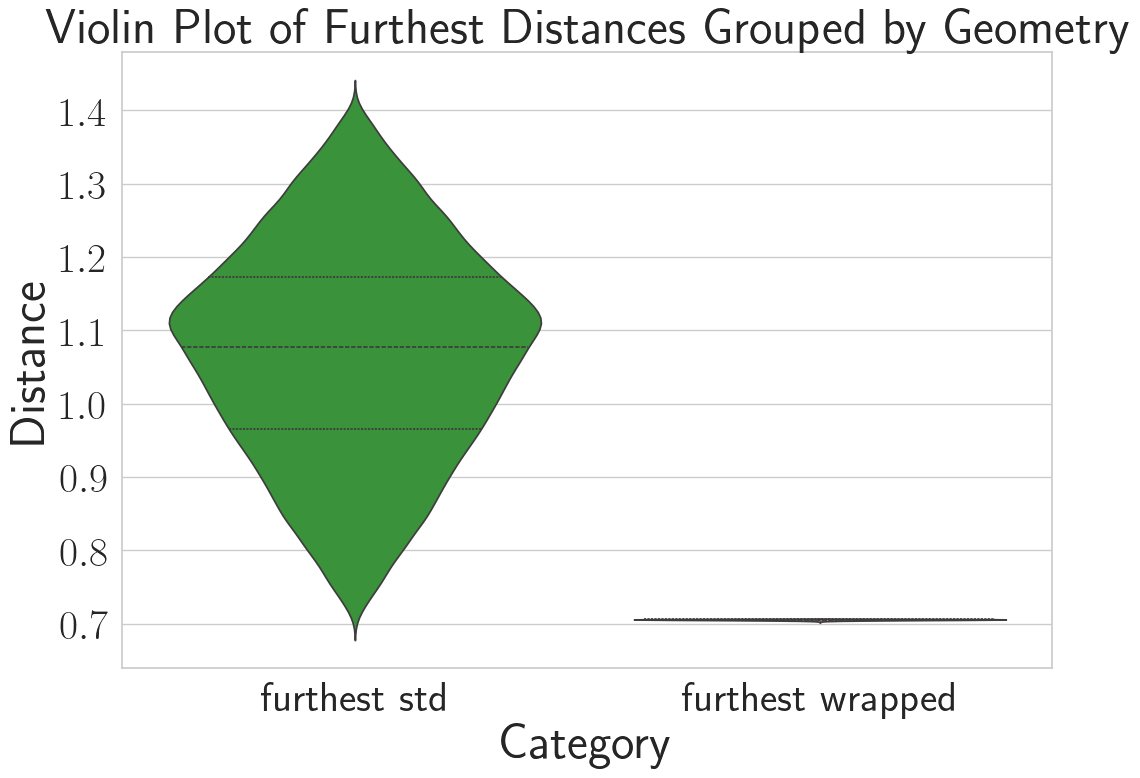

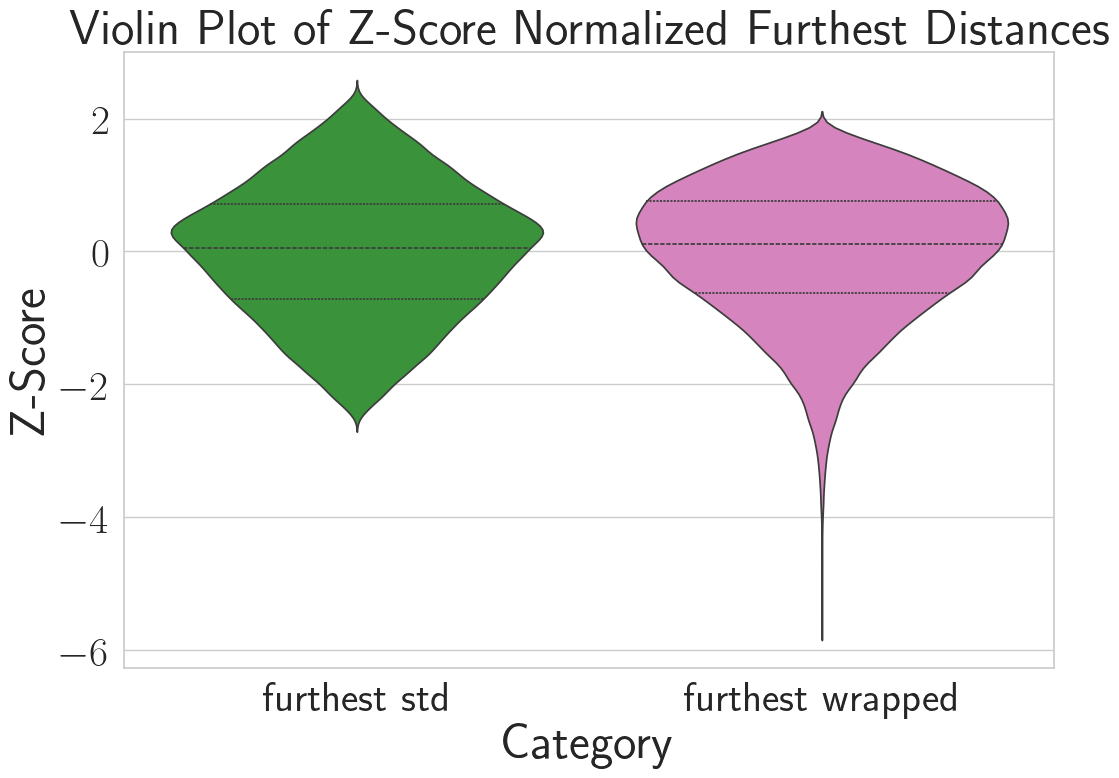

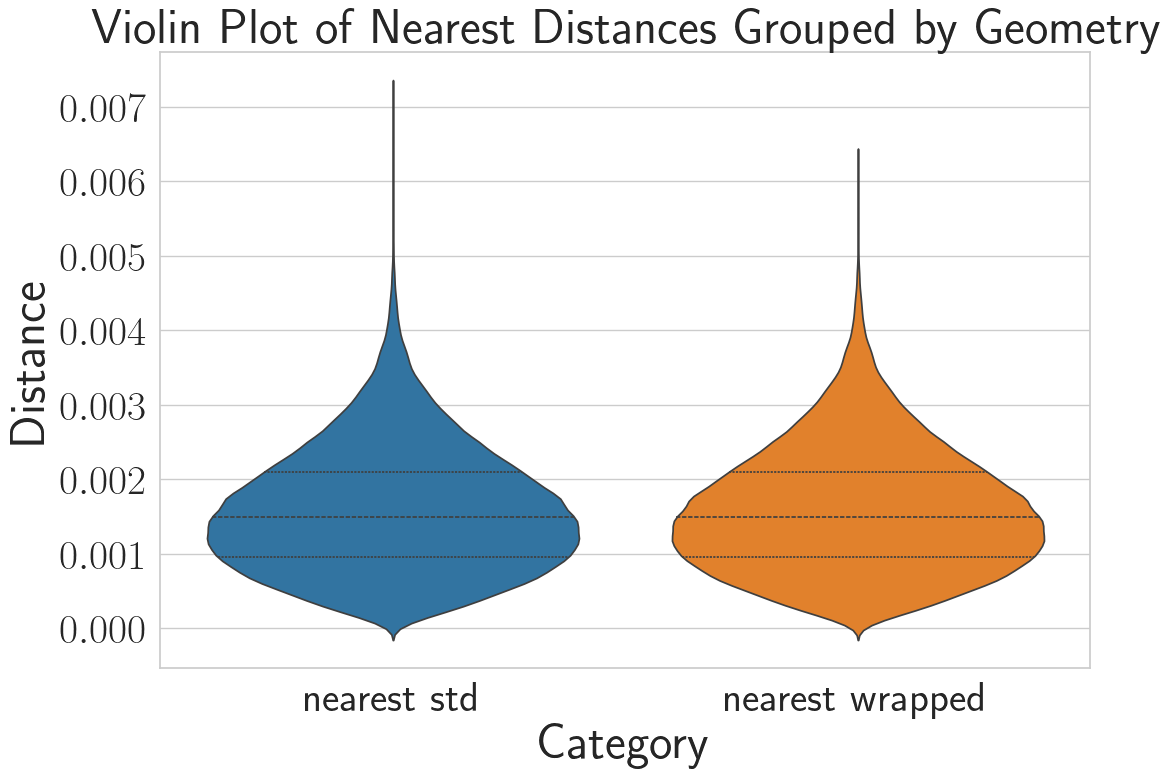

In [7]:
sns.set(style="whitegrid")

# Make violin plot based on furthest distances
# Create the histogram grouped by Category
# Plot violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=furthests, x = "Category", y="distance", hue="Category" , palette=["tab:green", "tab:pink"], inner = "quartile")
# Add title and labels
plt.title("Violin Plot of Furthest Distances Grouped by Geometry", fontsize=36)
plt.xlabel("Category", fontsize=36)
plt.ylabel("Distance", fontsize=36)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.savefig("Violin Plot of Furthest Distances Grouped by Geometry.pgf", format = "pgf")
plt.show()

# Make violin plot based on furthest distances (normalised to investigate distribution)
furthest_stds[0]["Z Score"] = (furthest_stds[0]["distance"] - furthest_stds[0]["distance"].mean()) / furthest_stds[0]["distance"].std()
furthest_wrappeds[0]["Z Score"] = (furthest_wrappeds[0]["distance"] - furthest_wrappeds[0]["distance"].mean()) / furthest_wrappeds[0]["distance"].std()
# Combine dataframes
combined = pd.concat([furthest_stds[0][["Z Score", "Category"]], furthest_wrappeds[0][["Z Score", "Category"]]])
# Plot violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=combined, hue="Category", x = "Category", y="Z Score", palette=["tab:green", "tab:pink"], inner = "quartile")
# Add title and labels
plt.title("Violin Plot of Z-Score Normalized Furthest Distances", fontsize=36)
plt.xlabel("Category", fontsize=36)
plt.ylabel("Z-Score", fontsize=36)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.savefig("Z-Score Normalized Furthest Distances.pgf", format = "pgf")
plt.show()


# Make violin plot based on nearest distances
# Create the histogram grouped by Category
# Plot violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=nearests, x = "Category", y="distance", hue="Category", palette=["tab:blue", "tab:orange"], inner = "quartile")
# Add title and labels
plt.title("Violin Plot of Nearest Distances Grouped by Geometry", fontsize=36)
plt.xlabel("Category", fontsize=36)
plt.ylabel("Distance", fontsize=36)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.savefig("Violin Plot of Nearest Distances Grouped by Geometry.pgf", format = "pgf")
plt.show()


### Plotting Performance Metrics - Comparison between All and Paritioned Scheduling
#### Direct Times

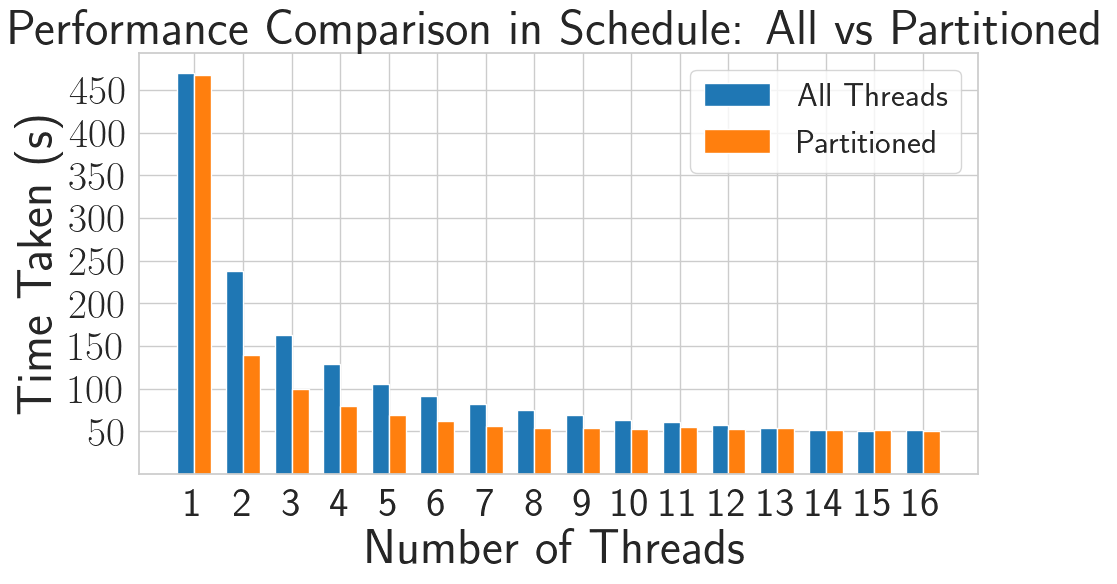

In [8]:
performance_all = pd.read_csv("runtimes\\schedule_all.txt", names = ["No. Threads", "Time Taken (s)"], delimiter = "\t")
performance_partitioned = pd.read_csv("runtimes\\schedule_partitioned.txt", names = ["No. Threads", "Time Taken (s)"], delimiter = "\t")

# Bar width and x positions
bar_width = 0.35
x = np.arange(len(performance_all["No. Threads"])) 

# Plot the bars
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, performance_all["Time Taken (s)"], width=bar_width, label="All Threads", color="tab:blue")
plt.bar(x + bar_width / 2, performance_partitioned["Time Taken (s)"], width=bar_width, label="Partitioned", color="tab:orange")

# Add title and labels and legend
plt.xlabel("Number of Threads", fontsize=36)
plt.ylabel("Time Taken (s)", fontsize=36)
plt.title("Performance Comparison in Schedule: All vs Partitioned", fontsize=36)
plt.xticks(x, performance_all["No. Threads"], fontsize = 30) 
plt.yticks(np.arange(np.min(performance_partitioned["Time Taken (s)"])-1, np.max(performance_partitioned["Time Taken (s)"]), 50),fontsize = 30)
plt.legend(fontsize=24)
plt.tight_layout()
plt.savefig("Performance Comparison in Schedule All vs Partitioned.pgf", format = "pgf")
plt.show()

#### Percentage Difference in Times

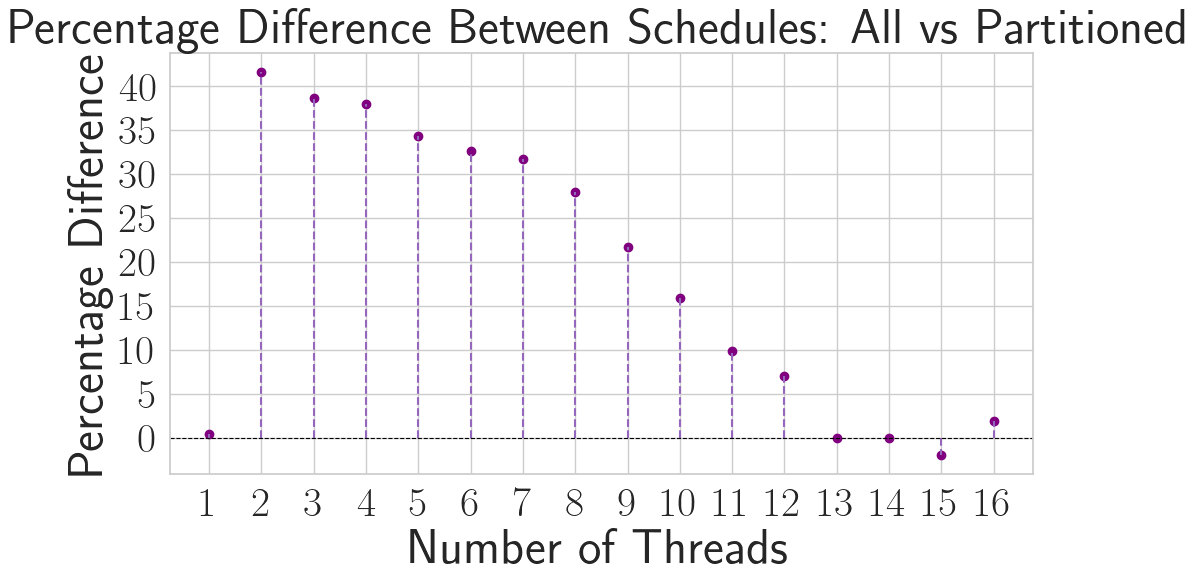

In [9]:
merged_df = pd.merge(performance_all, performance_partitioned, on="No. Threads", suffixes=('_all', '_partitioned'))

# Calculate percentage difference
merged_df["Percentage Difference (%)"] = (
    (merged_df["Time Taken (s)_all"] - merged_df["Time Taken (s)_partitioned"]) 
    / merged_df["Time Taken (s)_all"]
) * 100

# Plot the percentage difference
plt.figure(figsize=(10, 6))
plt.vlines(
    merged_df["No. Threads"], 
    ymin=0, 
    ymax=merged_df["Percentage Difference (%)"], 
    color="tab:purple", 
    linestyles="dashed"
)
plt.scatter(merged_df["No. Threads"], merged_df["Percentage Difference (%)"], color="purple", label="Percentage Difference")


# Add title and labels and legend
plt.xlabel("Number of Threads", fontsize=36)
plt.ylabel("Percentage Difference", fontsize=36)
plt.title("Percentage Difference Between Schedules: All vs Partitioned", fontsize=36)
plt.xticks(merged_df["No. Threads"], fontsize = 30)  # Ensure thread counts are marked on the x-axis
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)  # Reference line at 0%
plt.yticks(np.arange(int(np.min(merged_df["Percentage Difference (%)"]))+1, int(np.max(merged_df["Percentage Difference (%)"])), 5).astype(int), fontsize = 30)
plt.tight_layout()
plt.savefig("Percentage Difference Between Schedules All vs Partitioned.pgf", format = "pgf")
plt.show()

## Aside
To help illustrate the problem, this plot was swiftly created arbitrary points. Don't expect to be robust please :D

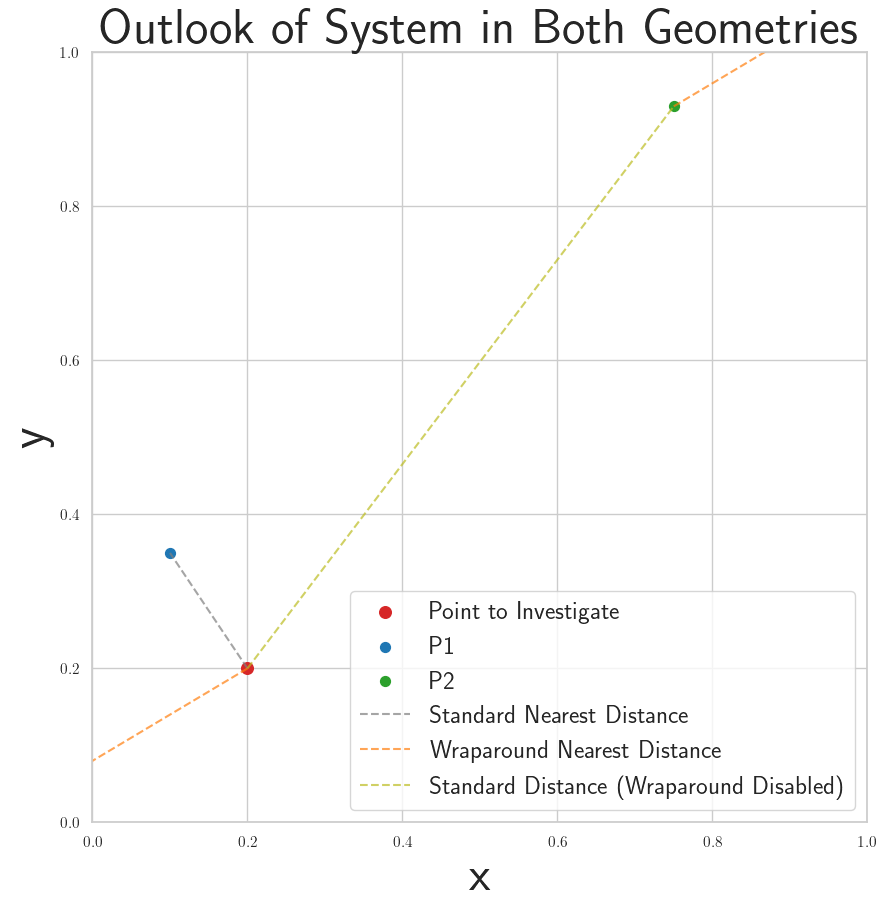

In [10]:
# Define arbitrary points
points = pd.DataFrame({"x": [0.2, 0.1, 0.75],
                       "y": [0.2, 0.35, 0.93]})
points.reset_index(inplace=True)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# plot scatter points
first_point = points.iloc[0]
ax.scatter(first_point["x"], first_point["y"], color="tab:red", s=70, label="Point to Investigate")
ax.scatter(points.iloc[1]["x"], points.iloc[1]["y"], s=50, color="tab:blue", label="P1")
ax.scatter(points.iloc[2]["x"], points.iloc[2]["y"], s=50, color="tab:green", label="P2")

# plot lines and calculate distances
for i in range(1, len(points)):
    other_point = points.iloc[i]
    dist = np.sqrt((first_point["x"] - other_point["x"])**2 + (first_point["y"] - other_point["y"])**2)

    if dist < 0.5:
        ax.plot([first_point["x"], other_point["x"]],
                 [first_point["y"], other_point["y"]],
                 linestyle="--",
                 color="tab:gray",
                 alpha=0.7,
                 label="Standard Nearest Distance")
    else:
        # Wraparound logic: Draw two lines for wraparound path
        dx = other_point["x"] - first_point["x"]
        dy = other_point["y"] - first_point["y"]
        
        wrap_x = other_point["x"] - np.sign(dx)  # Adjust x by subtracting or adding 1
        wrap_y = other_point["y"] - np.sign(dy)  # Adjust y by subtracting or adding 1
        ax.plot([first_point["x"], wrap_x],
                 [first_point["y"], wrap_y],
                 linestyle="--",
                 color="tab:orange",
                 alpha=0.7)
        ax.plot([other_point["x"], first_point["x"] + 1],
                 [other_point["y"], first_point["y"] + 1],
                 linestyle="--",
                 color="tab:orange",
                 alpha=0.7,
                 label="Wraparound Nearest Distance")

# Final line for standard distance
ax.plot([first_point["x"], points.iloc[-1]["x"]],
        [first_point["y"], points.iloc[-1]["y"]],
        linestyle="--",
        color="tab:olive",
        alpha=0.7,
        label="Standard Distance (Wraparound Disabled)")

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel("x", fontsize=36) 
ax.set_ylabel("y", fontsize=36)
ax.set_title("Outlook of System in Both Geometries", fontsize=36)
plt.legend(fontsize=18)
plt.savefig("System Diagram.pgf", format="pgf")
plt.show()
